In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
file_name='car_clean.csv'

df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [2]:
df[['bore','stroke','compression-ratio','horsepower']].corr()                       #if 1 is perfect positive corr 
                                                                                    #if -1 is perfect negitive corr 
                                                                                    #if 0 is no corr

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


(0.0, 339.25)

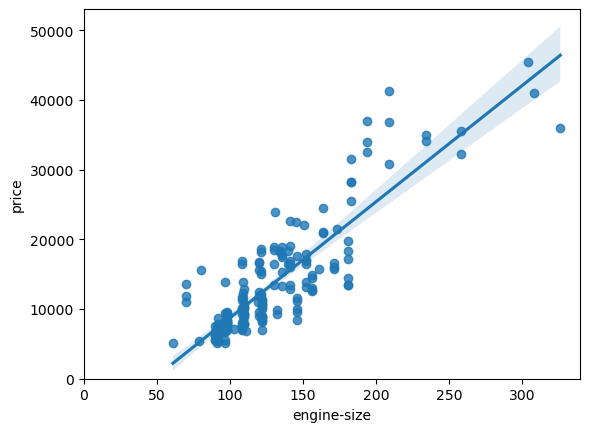

In [3]:
sns.regplot(x='engine-size',y="price",data=df)
plt.ylim(0,)
plt.xlim(0,)

In [4]:
df[['price','engine-size']].corr()

,price,engine-size
price,1.000000,0.872335
engine-size,0.872335,1.000000


<Axes: xlabel='engine-size', ylabel='price'>

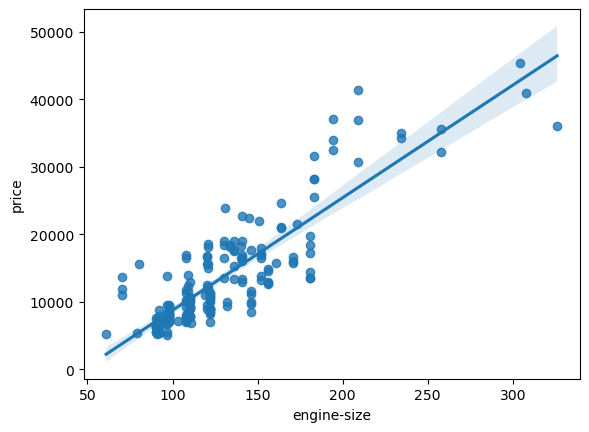

In [5]:
sns.regplot(x='engine-size',y='price',data=df)             #good corr

In [6]:
df[['highway-L/100km','price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


<Axes: xlabel='highway-L/100km', ylabel='price'>

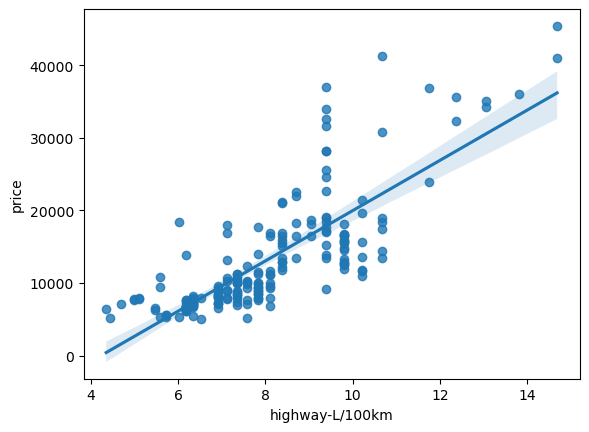

In [7]:
sns.regplot(x='highway-L/100km',y='price',data=df)                   #good corr

In [8]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

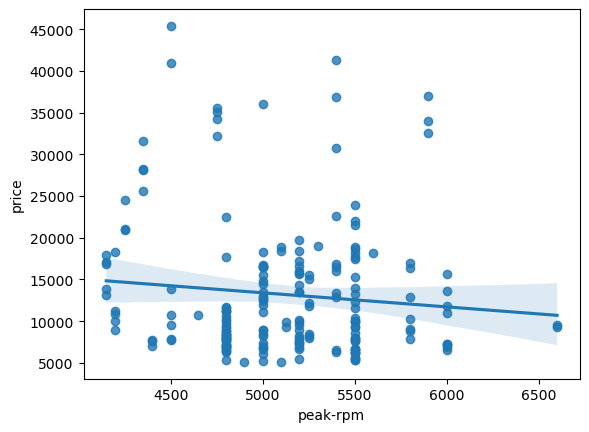

In [9]:
sns.regplot(x='peak-rpm',y='price',data=df)                   #week corr

In [10]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<Axes: xlabel='stroke', ylabel='price'>

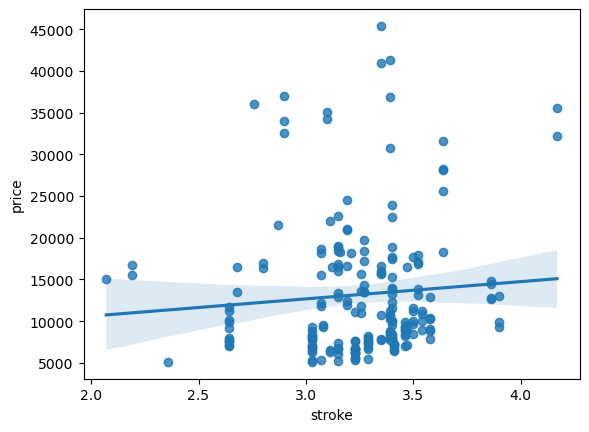

In [11]:
sns.regplot(x='stroke',y='price',data=df)

<Axes: xlabel='body-style', ylabel='price'>

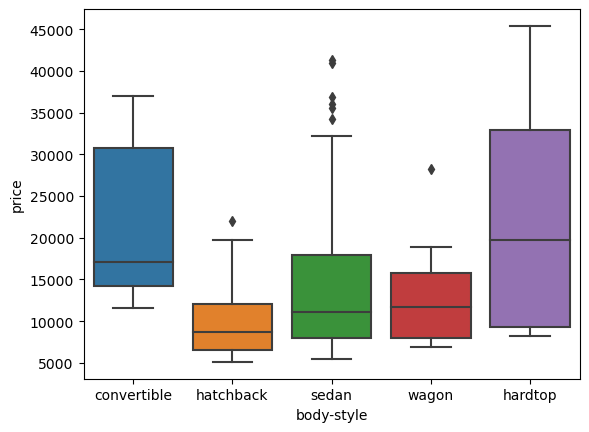

In [12]:
sns.boxplot(x='body-style',y='price',data=df)

<Axes: xlabel='engine-location', ylabel='price'>

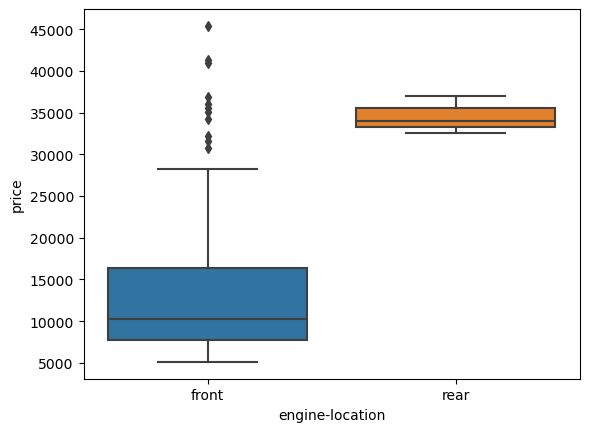

In [13]:
sns.boxplot(x='engine-location',y='price',data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

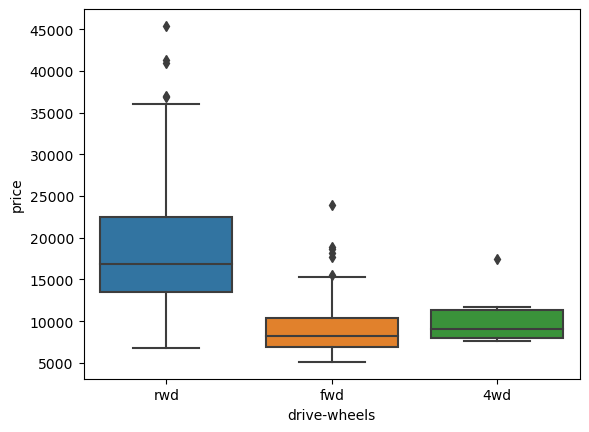

In [14]:
sns.boxplot(x='drive-wheels',y='price',data=df)

In [15]:
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [16]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [17]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [18]:
drive_wheels_count=df['drive-wheels'].value_counts().to_frame()
drive_wheels_count.rename(columns={'drive-wheels':'value_counts'},inplace=True)

In [19]:
drive_wheels_count

,value_counts
fwd,118
rwd,75
4wd,8


In [20]:
drive_wheels_count.index.name = 'drive-wheels'
drive_wheels_count

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [21]:
engine_loc_count=df['engine-location'].value_counts().to_frame()
engine_loc_count.rename(columns={'engine-location':'value_count'},inplace=True)
engine_loc_count.index.name='engine-location'
engine_loc_count

,value_count
engine-location,
front,198
rear,3


In [22]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [23]:
df_group_one=df[['drive-wheels','price']]
df_group_one


,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
...,...,...
196,rwd,16845.0
197,rwd,19045.0
198,rwd,21485.0
199,rwd,22470.0


In [24]:
#group by one variable

df_group_one=df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [25]:
#group by two variable
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [26]:
#convert the dataframe to a pivot table
#drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table

grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [27]:
#fill missing values with 0
grouped_pivot=grouped_pivot.fillna(0)   
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

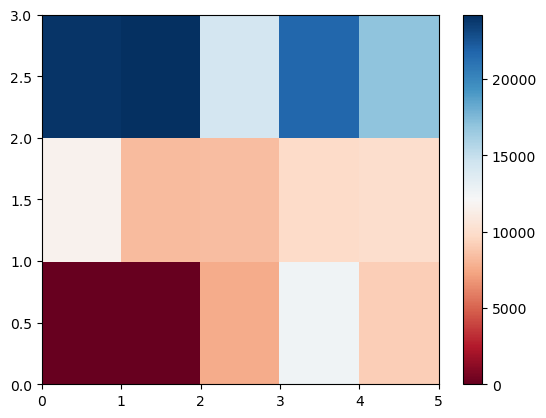

In [28]:
#use heat map

plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

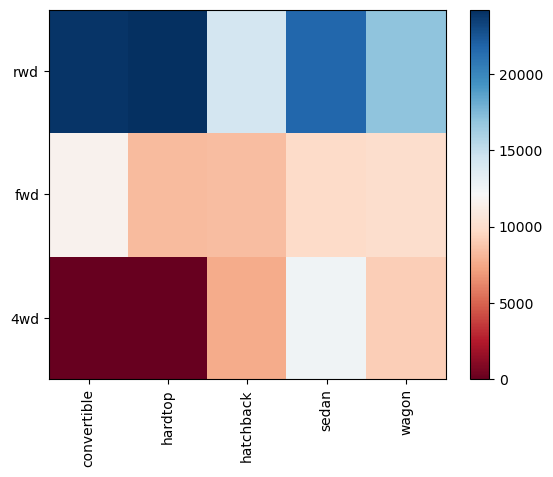

In [29]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [30]:
#calculate the Pearson Correlation Coefficient and P-value

from scipy import stats

pearson_coef,p_value=stats.pearsonr(df['wheel-base'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)


Pearson Correlation Coefficient is= 0.5846418222655081  with P-value is= 8.076488270732885e-20


In [31]:
pearson_coef,p_value=stats.pearsonr(df['horsepower'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)


Pearson Correlation Coefficient is= 0.8096068016571054  with P-value is= 6.273536270650351e-48


In [32]:
pearson_coef,p_value=stats.pearsonr(df['length'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)

Pearson Correlation Coefficient is= 0.690628380448364  with P-value is= 8.016477466158868e-30


In [33]:
pearson_coef,p_value=stats.pearsonr(df['width'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)

Pearson Correlation Coefficient is= 0.7512653440522674  with P-value is= 9.20033551048144e-38


In [34]:

pearson_coef,p_value=stats.pearsonr(df['curb-weight'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)

Pearson Correlation Coefficient is= 0.8344145257702846  with P-value is= 2.1895772388937294e-53


In [35]:

pearson_coef,p_value=stats.pearsonr(df['engine-size'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)

Pearson Correlation Coefficient is= 0.8723351674455185  with P-value is= 9.265491622198793e-64


In [36]:

pearson_coef,p_value=stats.pearsonr(df['bore'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)

Pearson Correlation Coefficient is= 0.5431553832626602  with P-value is= 8.049189483935315e-17


In [37]:
pearson_coef,p_value=stats.pearsonr(df['city-L/100km'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)

Pearson Correlation Coefficient is= 0.7898975136626941  with P-value is= 3.903106400940232e-44


In [38]:
pearson_coef,p_value=stats.pearsonr(df['highway-L/100km'],df['price'])
print("Pearson Correlation Coefficient is=",pearson_coef," with P-value is=",p_value)

Pearson Correlation Coefficient is= 0.8011176263981974  with P-value is= 3.0467845810414008e-46
